<a href="https://colab.research.google.com/github/Satish055/Machine_Learning_D/blob/main/Car_Price_Prediction_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Car Price Prediction with Python**

In [25]:
# Importing Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import Lasso

In [3]:
# importing the dataset into ml
dataset = pd.read_csv('/content/car data.csv')

**Displayin first 5 rows from Dataset **

In [4]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Shape of dataset

In [5]:
dataset.shape

(301, 9)

Information

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


To find the Missing values in dataset

In [7]:
dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [8]:
dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [12]:
print(dataset['Car_Name'].value_counts())
print(dataset['Fuel_Type'].value_counts())
print(dataset['Seller_Type'].value_counts())
print(dataset['Transmission'].value_counts())

Car_Name
city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Honda Activa 125       1
Hero Hunk              1
Hero  Ignitor Disc     1
Hero  CBZ Xtreme       1
Bajaj  ct 100          1
Name: count, Length: 98, dtype: int64
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


**Handling the Categorical Values **

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Fuel_Type'] = le.fit_transform(dataset['Fuel_Type'])

In [14]:
dataset['Transmission']=le.fit_transform(dataset['Transmission'])

In [15]:
dataset['Seller_Type']=le.fit_transform(dataset['Seller_Type'])

In [16]:
dataset.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
249,i20,2016,5.25,7.60,17000,2,0,1,0
88,etios liva,2013,3.45,6.05,47000,2,0,1,0
119,Royal Enfield Thunder 500,2013,1.05,1.90,5400,2,1,1,0
65,etios liva,2014,4.75,6.95,45000,1,0,1,0
43,dzire,2014,5.50,8.06,45780,1,0,1,0


**SPLITTING THE DATASET INTO X AND Y **

In [20]:
X=dataset.drop(['Car_Name','Selling_Price'],axis=1)
y=dataset['Selling_Price']

In [18]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0


In [21]:
y.head()

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


Splitting into training and test data

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print(f'X_train Shape:{X_train.shape}')
print(f'X_test Shape:{X_test.shape}')
print(f'Y_train Shape:{y_train.shape}')
print(f'y_test Shape:{y_test.shape}')

X_train Shape:(240, 7)
X_test Shape:(61, 7)
Y_train Shape:(240,)
y_test Shape:(61,)


**Applying Linear Regression Model**

In [24]:
linear_regressor=LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression()

Applying Metric on training data

In [26]:
m=linear_regressor.coef_
c=linear_regressor.intercept_
print(f'Slope:{m}')
print(f'Intercept:{c}')

Slope:[ 4.23406978e-01  4.41987483e-01 -4.82835255e-06 -1.54833224e+00
 -1.20366204e+00 -1.86575915e+00  3.87178280e-01]
Intercept:-846.272920309242


In [30]:
y_pred_train=linear_regressor.predict(X_train)

In [36]:
mae=mean_absolute_error(y_train,y_pred_train)
mse=mean_squared_error(y_train,y_pred_train)
rmse=np.sqrt(mse)
r2=r2_score(y_train,y_pred_train)
print(f'Mean Absolute Error:{mae}')
print(f'Mean Squared Error:{mse}')
print(f'Root Mean Squared Error:{rmse}')
print(f'R2 Score:{r2}')

Mean Absolute Error:1.2170411125163967
Mean Squared Error:3.211303980854614
Root Mean Squared Error:1.7920111553376596
R2 Score:0.8800594535535693)


**DATA VISUALIZATION**

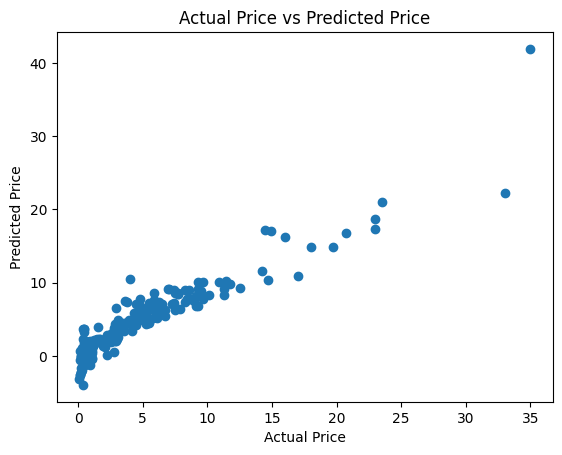

In [38]:
plt.scatter(y_train,y_pred_train)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

Data Valuation on Test Data

In [40]:
y_pred_test=linear_regressor.predict(X_test)

In [43]:
mae=mean_absolute_error(y_test,y_pred_test)
mse=mean_squared_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_test)
print(f'Mean Absolute Error:{mae}')
print(f'Mean Squared Error:{mse}')
print(f'Root Mean Squared Error:{rmse}')
print(f'R2 Score:{r2}')

Mean Absolute Error:1.1530045916165366
Mean Squared Error:3.2876460857192322
Root Mean Squared Error:1.8131867211402228
R2 Score:0.8484549412088814


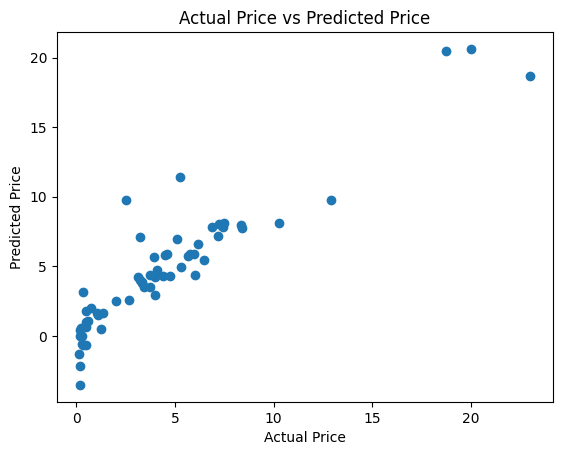

In [44]:
plt.scatter(y_test,y_pred_test)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

USING LASSO

In [45]:
lass_reg=Lasso()
lass_reg.fit(X_train,y_train)

Lasso()

In [46]:
y_pred_lass0=lass_reg.predict(X_train)

In [48]:
mae=mean_absolute_error(y_train,y_pred_lass0)
mse=mean_squared_error(y_train,y_pred_lass0)
rmse=np.sqrt(mse)
r2=r2_score(y_train,y_pred_lass0)

In [49]:
print(f'Mean Absolute Error:{mae}')
print(f'Mean Squared Error:{mse}')
print(f'Root Mean Squared Error:{rmse}')
print(f'R2 Score:{r2}')

Mean Absolute Error:1.2996122047047642
Mean Squared Error:4.240193313335071
Root Mean Squared Error:2.059172968289714
R2 Score:0.8416309679582044


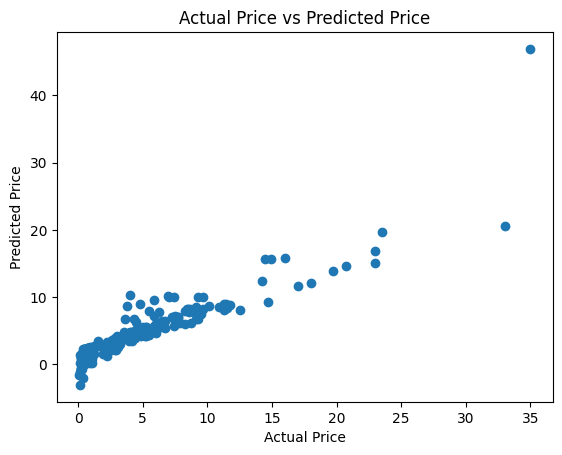

In [53]:
plt.scatter(y_train,y_pred_lass0)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

Test on Lasso

In [50]:
y_pred_lass_x=lass_reg.predict(X_test)

In [51]:
mae=mean_absolute_error(y_test,y_pred_lass_x)
mse=mean_squared_error(y_test,y_pred_lass_x)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_lass_x)
print(f'Mean Absolute Error:{mae}')
print(f'Mean Squared Error:{mse}')
print(f'Root Mean Squared Error:{rmse}')
print(f'R2 Score:{r2}')

Mean Absolute Error:1.0639789858382975
Mean Squared Error:3.1570345278485266
Root Mean Squared Error:1.7768045834723993
R2 Score:0.8544755211923214


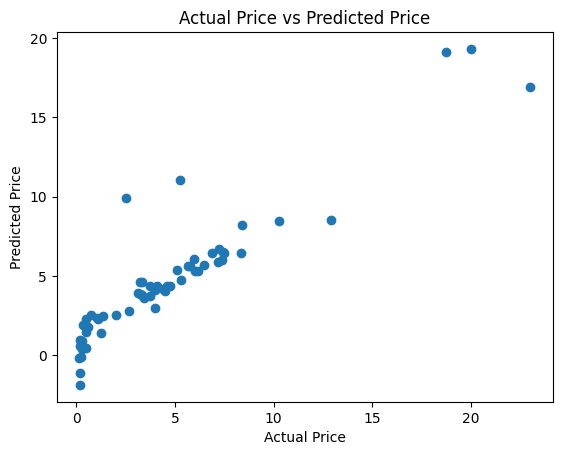

In [54]:
plt.scatter(y_test,y_pred_lass_x)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()